**Econ691-06 | Hanh Nong**
# <center>ASSIGNMENT 3</center>

In [1]:
#setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sfa
from statsmodels.iolib.summary2 import summary_col
from scipy import stats
import seaborn as sns
from scipy.stats import norm

## PROBLEM 1: POWER

### (25 points) 
You need to calculate power for a standard experiment (e.g. no issues regarding noncompliance), and assume you are operating under the following assumptions:

- The ratio of the effect size you want to detect to the standard deviation of noise, i.e. $\beta/\sigma$, is equal to 0.1.
- You are going to reject tests at the 1% level.
- You will always have at least 1000 control units.
- You will never have more than 3000 control units.
- You will never have more than 5000 treatment units.

Plot, on a graph with the x-axis and y-axis as the number of treated and control units respectively, the curve trading off the number of treated and control units you need to get power of 60%; and then add the same curves for 70%, 80%, and 90% power.

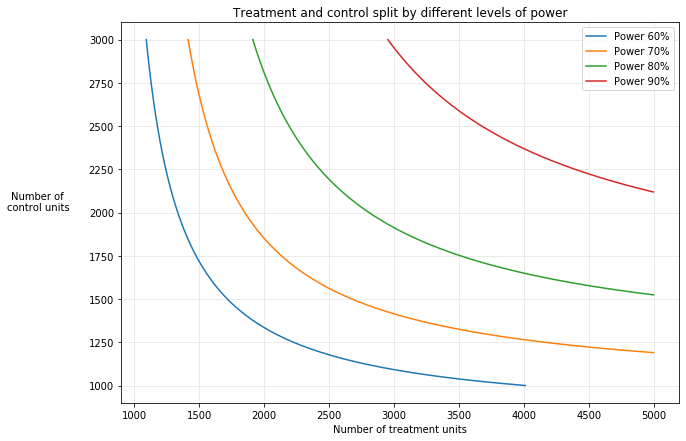

In [109]:
plt.figure(figsize = (10, 7))
plt.grid(color='0.9')

beta_sigma = 0.1 #effect size ratio beta/sigma
alpha = 0.01 #significance level
nc_min = 1000 #minimum control units
nc_max = 3000 #maximum control units
nt_max = 5000 #maximum treatment units

c_alpha = norm.ppf(1-alpha/2)
power = [0.6, 0.7, 0.8, 0.9]
for p in power:
    p_cdf = norm.ppf(1-p)
    #1/nt + 1/nc:
    ntnc = (beta_sigma/(c_alpha - p_cdf))**2
    nc = []
    nt = []
    for nc_u in range(nc_min,nc_max+1):
        nt_u = 1/(ntnc - 1/nc_u)
        if (nt_u <= nt_max and nt_u > 0):
            nc.append(nc_u)
            nt.append(nt_u)
    plt.plot(nt, nc, label = 'Power '+str(int(p*100))+'%')
    
plt.title('Treatment and control split by different levels of power')
plt.xlabel('Number of treatment units')
plt.ylabel('Number of \ncontrol units', rotation=0, labelpad=50)
plt.legend()
plt.show()

## PROBLEM 2: SURROGATES

Consider the following scenario: Airbnb wants to understand the effect of boosting host earnings in the US for October 1 (for instance, by giving the service fees it collects to hosts) on the number of bookings that a host accepts over the month of October. Unable to wait until the end of October to assess the one-day experiment, Airbnb considers utilizing the surrogacy methodology.

Now consider five variants of this experiment. For each variant, which one of the key assumptions is most likely violated, and why? Limit your answer to one to two sentences per answer.

*Causal pathway: Treatment: Giving service fees on Oct 1 $\longrightarrow$ Outcome: Number of bookings of October*

### 2.1. (5 points) 
**Airbnb uses the number of bookings that a host accepts on October 1 as the surrogate variable.**

Surrogacy assumption violated. Number of bookings accepted on October 1 might not be the only pathway to outcome.

### 2.2. (5 points)
**Airbnb uses the same surrogate variable, but changes the treatment to run from October 1 through October 3.**

Surrogacy assumption violated. By using the number of booking on October 1 only, AirBnb excludes the pathways from treatment on October 2 and 3 to outcome.

### 2.3. (5 points) 
**Airbnb uses two surrogate variables: the number of bookings that a host accepts from October 1 through October 3, and the number of properties that a host lists from October 1 through October 3. The treatment goes back to being deployed on October 1 only.**

Comparability assumption likely to be violated. The link between bookings and listings on Oct 2 and 3 to the Oct's bookings in the observational data might not be the same as in the experiment as the experiment only runs for 1 day, experimental data might not include data of Oct 2 & 3.

### 2.4. (5 points) 
**Airbnb uses a long-running observational study from Japan to link its chosen surrogates to the downstream outcome.**

Comparability assumption violated. The link between bookings and/or listings to a full month's bookings in the Japan study might not be consistent with the experiment as it's unclear how the observational study in Japan carried out.

### 2.5. (5 points) 
**Airbnb uses observational data from the month of August (which is already available and without lags) to identify the treatment effect.**

Comparability assumption violated. Observationals data of August could have seasonal bookings which might not present in the experiment, and hence cannot guarantee the same link between surrogates to the long-term outcome as in experimental data.

## PROBLEM 3: NETWORK EFFECTS

Suppose you are a data scientist at Zynga, working on a new mobile game. Until now, the game has been a single-player experience; but your developers have created a multi-player experience with people in your city. They want to see how much revenue they earn from players with the new multi-player version. Your current single-player game is used in thirty-six cities around the country, and for simplicity, we assume that each city has 1,000 users exactly. You naturally suspect the presence of network effects within any given city.

There are three versions of the experiment you can run. In one version (person-level randomization), you randomize 50% of people in the country (the multi-player version) while keeping 50% in control (the single-player version). In a second version (city-level randomization), you randomize entire cities: all 1,000 users in each city are all given treatment, or all 1,000 users are kept on control. In a third version (two-stage randomization), you first randomize cities to treatment fractions, e.g. you put 60% of Atlanta into treatment, 10% of Austin into treatment, etc; and then you randomize people in each city accordingly. Note that in all cases, the sizes of the treatment and control group are predetermined, e.g. in the first version the experimenter will always have exactly 18,000 units in each group.

The data following all three of these experiments is in the file data assignment3.csv. The file has 36,000 rows. Each row corresponds to a separate user, for which there are seven columns. The first column is the user's city. The second, third, and fourth columns are the their treatment assignment under each of these schematics respectively: treatment person refers to treatment assignment under person-level randomization, treatment city refers to treatment assignment under city-level randomization, and treatment twostage refers to treatment assignment under the two-stage randomization. The fifth, sixth, and seventh columns refer to the outcome (revenue) under each of these randomization schematics.

In [3]:
#load & inspect data
data = pd.read_csv("data_assignment3.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 7 columns):
city                  36000 non-null object
treatment_person      36000 non-null int64
treatment_city        36000 non-null int64
treatment_twostage    36000 non-null int64
revenue_person        36000 non-null float64
revenue_city          36000 non-null float64
revenue_twostage      36000 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.9+ MB


In [5]:
data.nunique()

city                     36
treatment_person          2
treatment_city            2
treatment_twostage        2
revenue_person        36000
revenue_city          36000
revenue_twostage      36000
dtype: int64

In [70]:
data.describe()

,treatment_person,treatment_city,treatment_twostage,revenue_person,revenue_city,revenue_twostage
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,0.500000,0.500000,0.500000,19.983618,20.733618,20.183618
std,0.500007,0.500007,0.500007,15.446951,15.238280,15.587335
min,0.000000,0.000000,0.000000,-32.038547,-30.502851,-30.267508
25%,0.000000,0.000000,0.000000,8.835350,9.793367,8.908868
50%,0.500000,0.500000,0.500000,19.078829,19.682453,19.275948
75%,1.000000,1.000000,1.000000,30.722051,31.042922,30.785979
max,1.000000,1.000000,1.000000,72.205189,74.540407,73.105189


In [4]:
#Get number of units in each group, person-level randomization.
nt1 = int(data['treatment_person'].sum())
nc1 = int(len(data) - nt1)
N1 = [nc1, nt1]

#Get number of units in each group, city-level randomization.
nt2 = int(data.query("treatment_city == 1")['city'].nunique())
nc2 = int(data['city'].nunique() - nt2)
N2 = [nc2, nt2]

In [5]:
#Set up bootstrap sample function
#Bootstrap approach: exact number of units in treatment and control
def bstr_sample(data, level, treatment_col, N):
    if level == "index":
        index_treatment = np.random.choice(np.where(data[treatment_col] == 1 )[0],
                                           replace = True, size = N[1])

        index_control = np.random.choice(np.where(data[treatment_col] == 0)[0],
                                         replace = True, size = N[0])

        sample = pd.concat([data.iloc[index_treatment], 
                            data.iloc[index_control]], 
                           ignore_index=True, sort=False)
    
    else:
        #Get unique values by level of randomization for each group
        level_treatment = data.loc[np.where(data[treatment_col] == 1)[0],
                                   level].unique()
        level_control = np.setdiff1d(data[level].unique(), level_treatment)

        #Randomize unique values of level for treatment & control group separately
        level_treatment_bstr = np.random.choice(level_treatment, 
                                                replace = True, size = N[1])
        level_control_bstr = np.random.choice(level_control, 
                                              replace = True, size = N[0])

        #Assemble sampling data 
        sample = pd.concat([data[data[level].isin(level_treatment_bstr)], 
                            data[data[level].isin(level_control_bstr)]],
                           ignore_index=True, sort=False)
    return sample

In [6]:
#Set up treatment effect estimation function
def ate(data, treatment_col, y):
    ate = (data.loc[np.where(data[treatment_col] == 1)[0], y].mean() - 
           data.loc[np.where(data[treatment_col] == 0)[0], y].mean())
    return ate

### 3.1. (5 points) 
**Using the frst version of the experiment - person-level randomization - estimate the treatment effect and the standard errors.**

In [7]:
ate1 = ate(data = data, treatment_col = 'treatment_person', y = 'revenue_person')
print("Treatment effect of person-level randomized experiment:",round(ate1,2))

Treatment effect of person-level randomized experiment: 3.48


In [8]:
#Run bootstrap for person-level
ate1_bstr = []
for i in range(1000):
    sample = bstr_sample(data = data, level = "index", 
                         treatment_col = 'treatment_person', N = N1)
    ate1_bstr.append(ate(data = sample, 
                         treatment_col = 'treatment_person', 
                         y = 'revenue_person'))    

In [10]:
#Get mean:
print("Bootstrap mean of person-level randomized experiment:",
      round(np.mean(ate1_bstr),2))

Bootstrap mean of person-level randomized experiment: 3.48


In [11]:
#Get standard errors:
print("Bootstrap standard errors of person-level randomized experiment:",
      round(np.std(ate1_bstr),2))

Bootstrap standard errors of person-level randomized experiment: 0.16


### 3.2. (5 points) 
**Using the second version of the experiment - city-level randomization - estimate the treatment effect and the standard errors. Remember that the units of the analysis in this schematic are not people but cities.**

In [12]:
ate2 = ate(data = data, 
           treatment_col = 'treatment_city', 
           y = 'revenue_city')
print("Treatment effect of city-level randomized experiment:",
      round(ate2,2))

Treatment effect of city-level randomized experiment: 1.15


In [13]:
#Run bootstrap for city-level
ate2_bstr = []
for i in range(10000):
    sample = bstr_sample(data = data, level = 'city', 
                         treatment_col = 'treatment_city', N = N2)
    ate2_bstr.append(ate(data = sample, 
                         treatment_col = 'treatment_city', 
                         y = 'revenue_city'))    

In [14]:
#Get mean:
print("Bootstrap mean of city-level randomized experiment:",
      round(np.mean(ate2_bstr),2))

Bootstrap mean of city-level randomized experiment: 1.18


In [15]:
#Get standard errors:
print("Bootstrap standard errors of city-level randomized experiment:",
      round(np.std(ate2_bstr),2))

Bootstrap standard errors of city-level randomized experiment: 3.0


### 3.3. (5 points) 
**Compare the two estimates on the basis of bias and variance. Under what conditions would you trust each one more?**

City-level randomization has lower bias but much higher variance. In this case, the standard error of city level is even greater than the effect. When the std is higher than the effect, it indicates this effect is not reliable.

City-level would be trusted more if the variance is not too high. In other words, the bias and variance is somewhat balanced. If cities are less independent from each other, that could help lower the variance.

Person-level would be trusted more if there is no interaction at all. However, such condition is not practical in this setting. If the level of interaction between units in the same city is less dense, then the bias would be less severe in exchange for higher variance. As bias-variance is more balanced, we can trust the estimate more.

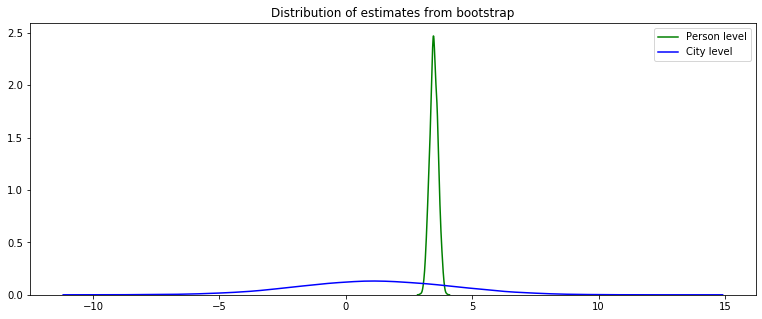

In [16]:
plt.figure(figsize = (13,5))
sns.kdeplot(ate1_bstr, color = 'green', label = "Person level")
sns.kdeplot(ate2_bstr, color = 'blue', label = "City level")
plt.title("Distribution of estimates from bootstrap")
plt.show()

### 3.4. 

**In addition to the concerns around bias and variance discussed above, these two estimates only target the total treatment effect; and do not allow us to identify a direct effect from any indirect effects. We will use the two-stage randomization schematic to improve on this. We will make the strong simplifying assumptions that the direct effect is constant, and that the direct and indirect treatment effects are additive.**

**(a) (10 points) Estimate the treatment effect within each city. Plot the estimated treatment effect against the proportion of the city treated, and fit a straight line to the data.**

In [9]:
#PREPARE DATA

#Group data by city and by treatment; then get mean revenue for each group in city
data_city = (data.groupby(['city', 'treatment_twostage'])['revenue_twostage'].mean()
             .unstack(-1))
data_city.columns = ['control', 'treatment']

#Get treatment effect for each city
data_city['effect'] = data_city.eval("treatment - control")

#Get proportion of the city treated
data_city['prop_treated'] = (data.groupby(['city'])['treatment_twostage'].sum()/
                             data.groupby(['city'])['treatment_twostage'].count())
data_city.head()

,control,treatment,effect,prop_treated
city,,,,
atlanta,18.790975,20.972616,2.181641,0.2
austin,28.063338,30.463572,2.400234,0.3
baltimore,3.117434,5.297700,2.180266,0.1
boston,18.250957,20.520640,2.269684,0.3
charlotte,2.660711,5.098931,2.438220,0.2


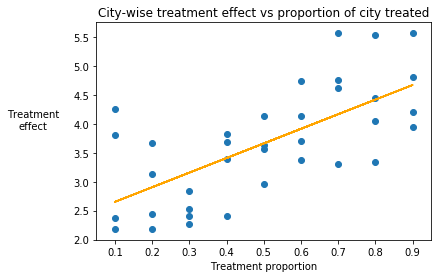

In [18]:
#PLOT TREATMENT EFFECT VS TREATMENT PROPORTION
plt.scatter(data_city['prop_treated'], data_city['effect'])
plt.plot(data_city['prop_treated'], 
         np.poly1d(np.polyfit(data_city['prop_treated'], 
                              data_city['effect'], 1))(data_city['prop_treated']), 
         color = 'orange')
plt.title("City-wise treatment effect vs proportion of city treated")
plt.xlabel("Treatment proportion")
plt.ylabel("Treatment\neffect", rotation=0, labelpad=40)
plt.show()

**(b) (5 points) Use the line to estimate the direct treatment effect and the indirect treatment effect on the treated. Since the direct effect is constant, a valid interpretation is that it is the effect of receiving treatment when nobody else in your city does. Furthermore, the indirect effect on the treated is the added effect, for a given treated user, as you move from nobody in your city to everyone in your city receiving treatment.**

In [19]:
#Run regression of effect on proportion of the treated.
#Intercept is the direct effect
te = sfa.ols("effect ~ prop_treated", data_city).fit(cov_type='HC1')
print(te.summary())

                            OLS Regression Results                            
Dep. Variable:                 effect   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     23.03
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           3.12e-05
Time:                        18:23:33   Log-Likelihood:                -38.470
No. Observations:                  36   AIC:                             80.94
Df Residuals:                      34   BIC:                             84.11
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3991      0.299      8.030   

In [20]:
ate3 = ate(data = data, 
           treatment_col = "treatment_twostage", 
           y = "revenue_twostage")
print("Treatment effect of two-stage randomized experiment:",round(ate3,3))
print("Direct effect:", round(te.params[0],3))
print("Indirect effect:", round(ate3 - te.params[0],3))

Treatment effect of two-stage randomized experiment: 5.275
Direct effect: 2.399
Indirect effect: 2.876


**(c) (5 points) Bootstrapping for two-stage randomization is fairly complex. Rather than implement it, describe verbally how you would do it.**

Step 1: We have 36 cities in total, each city is treated as an independent cluster and all these cities should be included in bootstrap at any iteration.

Step 2: Define number of units in each city. In the experiment, there are exact 1,000 units for each city. This will be preserved in bootstrap

Step 3: Define range of treatment/control split. 
- There are nine splits in the experimental data (from 10% to 90%, with step of 10%). These splits will be preserved in the bootstrap.
- Set up a range of treatment/control splits using the above splits.
- Noted that there are 4 cities for each split (see the graph in 3.4a). I'm not sure whether this is intentional; but I will retain this ratio in bootstrap.

Step 4: Randomly assign a treatment/control split from the range in Step 3 for each city. The size of sample for each split should be 4; meaning a split must be repeated exactly 4 times at each iteration and we have to ensure all 36 cities show up in the sample (because we bootstrap the split, not the city).

Step 5: Sampling treatment & control units separately within each city using the randomized split in Step 4, with replacement.

**(d) (5 points) Note that standard errors generated when you implement the bootstrap are respectively 0.32 and 0.58. Using this information, compare this estimator to the frst two on bias and variance.**

Compare with person-level: both direct and indirect effects have higher variance and hence, should have lower bias as person level is much more granulated than two-stage randomization.

Compare with city-level: both effects have much lower variance, & therefore should have higher bias as city is a much more coarse unit compared to two stage.

Two-stage randomization is like a combination of these two level, where it takes on a bit more variance from city level and a more bias from person level to balance the bias-variance trade-off.

In [24]:
print("std of person-level bootstrap:", round(np.std(ate1_bstr),2))
print("std of city-level bootstrap:", round(np.std(ate2_bstr),2))

std of person-level bootstrap: 0.16
std of city-level bootstrap: 3.0
